<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap05_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

World Population

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 6.5 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

World Population Growth

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [5]:
from pandas import read_html
filename = 'World_population_estimates.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')
table3 = tables[2]
table3.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
table3.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']
census = table3.census / 1e9
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, dtype: float64

In [7]:
un = table3.un / 1e9
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

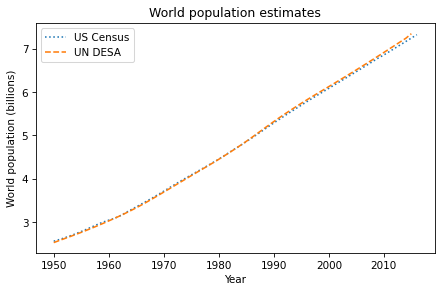

In [8]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billions)')
plot_estimates()
decorate(title='World population estimates')

Absolute and Relative Errors

In [9]:
from numpy import abs
abs_error = abs(un - census)
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

In [10]:
from numpy import mean
mean(abs_error)
from numpy import max
max(abs_error)
rel_error = 100 * abs_error / census
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [11]:
mean(rel_error)

0.5946585816022846

Modeling Population Growth

In [12]:
census[2012]
total_growth = census[2014] - census[2012]
t_0 = census.index[4]
t_0

1954

In [13]:
t_end = census.index[-9]
t_end

2008

In [14]:
elapsed_time = t_end - t_0
elapsed_time

54

In [15]:
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
total_growth

3.978821676

In [16]:
annual_growth = total_growth / elapsed_time
annual_growth

0.07368188288888888

Simulating Population Growth

In [17]:
results = TimeSeries()
results[t_0] = p_0
show(results)

,Quantity
Time,
1954,2.730228


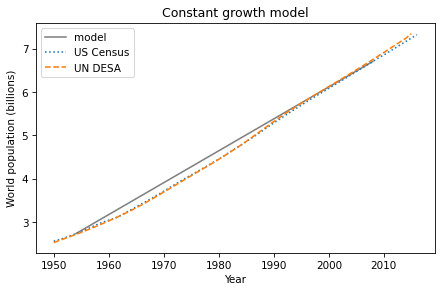

In [18]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')

**Exercises**

Exercise 1

In [19]:
total_growth = census[2014] - census[1990]
t_0 = census.index[2]
t_end = census.index[-2]
elapsed_time = t_end - t_0
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

In [20]:
t_0 = census.index[2]
t_end = census.index[-2]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]

total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

results = TimeSeries()
results[t_0] = p_0

for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

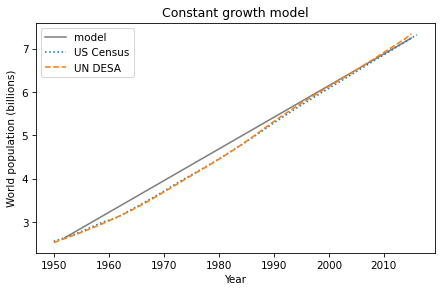

In [21]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')